### Actividad Clase Puntos
__Gabriela Cortés Merchán__
__Cod: 2229034__

**Ejercicio:** Realizar un radial bar chart con la variable 'Tipo de Contrato'dónde se visualice el porcentaje de cada tipo de contrato

In [1]:
import pandas as pd
import numpy as nphttp://localhost:8889/notebooks/Visualizaci%C3%B3n/Actividad_clase_13_03.ipynb#
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [2]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

In [3]:
df_SECOP = pd.read_csv('C:/Users/Gabriela C/Downloads/Datos_SECOP_LT.csv', 
                 sep = ',',
                 index_col=0,
                 dtype={
                     'Nit Entidad': str
                 })
df_SECOP.head()

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Duración mes
0,SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRI...,800217123,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1090917,CDPS-018-2020_2,CO1.BDOS.1054442,CONTRATO DE PRESTACIÓN DE SERVICIOS.,Presentación de oferta,2020-01-21,34387200,Contratación directa,8,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,8.0
1,MUNICIPIO DE SANTIAGO DE CALI - SECRETARIA DE ...,890399011,No Definido,No Definido,Territorial,CO1.REQ.1263855,4145.010.32.1.0131-2020,CO1.BDOS.1225749,PROFESIONALES DESARROLLO DE ESTRATEGIAS PARA L...,Presentación de oferta,2020-04-29,29117793,Contratación directa,0,ND,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,0.0
2,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,No Definido,No Definido,Territorial,CO1.REQ.1116938,SGA-CD-151-2020_2,CO1.BDOS.1077727,SGA-CD-151-2020_2,Presentación de oferta,2020-02-03,29816133,Contratación directa,165,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,5.5
3,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,899999034,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1546629,PSP-DC-CICG-083-2020,CO1.BDOS.1501825,Prestación de servicios personales de carácter...,Presentación de oferta,2020-10-15,6443255,Contratación directa,51,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,1.7
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,No Definido,No Definido,Territorial,CO1.REQ.1765407,CPS-1339-2021,CO1.BDOS.1715307,PRESTAR SERVICIOS PROFESIONALES Y APOYO A LA G...,Presentación de oferta,2021-01-29,2980278,Contratación régimen especial,1,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Decreto 092 de 2017,1.0


In [4]:
tab5 = df_SECOP["Tipo de Contrato"].value_counts().rename_axis('label').reset_index(name='counts')
tab5

,label,counts
0,Servicios de aprovisionamiento,591304
1,Suministros,45029
2,Compraventa,41921
3,27 - Otros servicios,40200
4,Decreto 092 de 2017,26740
5,Obra,11648
6,Alquiler de edificios,7156
7,ND,5068
8,Interventoría,4678
9,Consultoría,4110


In [5]:
total = tab5['counts'].sum()
total
tab52=tab5.copy()
for i in ["counts"]:
    tab52[i]= round(tab52[i]/total*100,2)

tab52

,label,counts
0,Servicios de aprovisionamiento,75.64
1,Suministros,5.76
2,Compraventa,5.36
3,27 - Otros servicios,5.14
4,Decreto 092 de 2017,3.42
5,Obra,1.49
6,Alquiler de edificios,0.92
7,ND,0.65
8,Interventoría,0.60
9,Consultoría,0.53


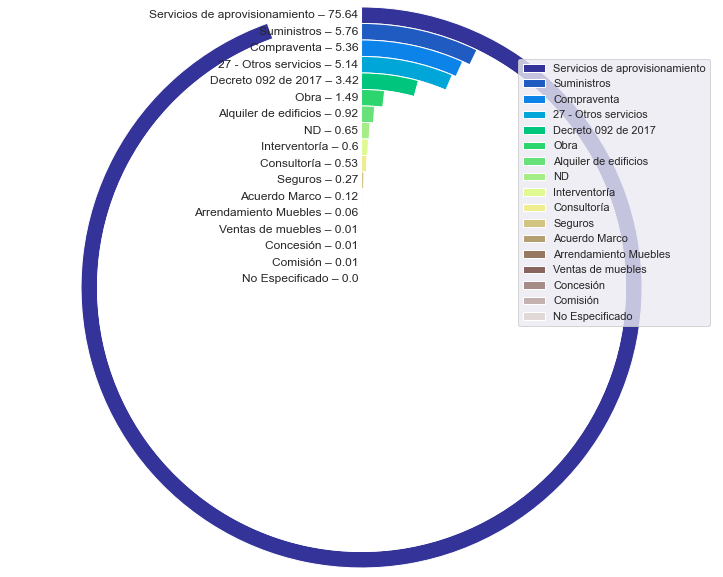

In [6]:
#COGER BARCHAT DISTRIBUIRLO EN UNA ESCALA RADIAAL
#PUNTO DE INICIO EL MISMO 
#REPRES4NTA UNA PROPPORCION QUE SE TRANSFORMAN EN ANGULOS 
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10


labels = tab52['label'] #CATEGORIAS
data = tab52['counts'] #CONTEO 

#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))# TRANSFORMACION EN LOGTARITMO 
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5 #RADIO 
#calculate width of each ring
#CALCULA EL LARGO EL ANGULO DE CADA UNA DE LAS BARRAS
w = r / n 


#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)] #NO SE PUEDE USAR PALETA DE COLORES 

#create figure, axis
#CREA LOS CIRCULOS 
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]]) # CRE UN PAI CHAR POR CADA CATEGORIA 
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    
plt.legend()
plt.show()

